In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Load dataset
df = pd.read_csv(r"C:\Users\subha\Downloads\Telecom+Customer+Churn\telecom_customer_churn.csv")

print("Data Shape:", df.shape)


print("\nMissing Values:")
print(df.isnull().sum())
# Filter only relevant churn categories (drop 'Joined')
df = df[df['Customer Status'].isin(['Stayed', 'Churned'])]

# Reset index
df.reset_index(drop=True, inplace=True)

# Preview dataset
df.head()

Data Shape: (7043, 38)

Missing Values:
Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                3877
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                        

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [2]:
print("Monthly Charge Stats:\n", df['Monthly Charge'].describe())
print("\nTotal Charges Stats:\n", df['Total Charges'].describe())
print("\nTenure Stats:\n", df['Tenure in Months'].describe())

Monthly Charge Stats:
 count    6589.000000
mean       65.030695
std        31.100727
min       -10.000000
25%        35.800000
50%        71.050000
75%        90.400000
max       118.750000
Name: Monthly Charge, dtype: float64

Total Charges Stats:
 count    6589.000000
mean     2432.042243
std      2265.500080
min        18.850000
25%       544.550000
50%      1563.900000
75%      4003.000000
max      8684.800000
Name: Total Charges, dtype: float64

Tenure Stats:
 count    6589.000000
mean       34.499772
std        23.968734
min         1.000000
25%        12.000000
50%        32.000000
75%        57.000000
max        72.000000
Name: Tenure in Months, dtype: float64


Customer Status
Stayed     4720
Churned    1869
Name: count, dtype: int64


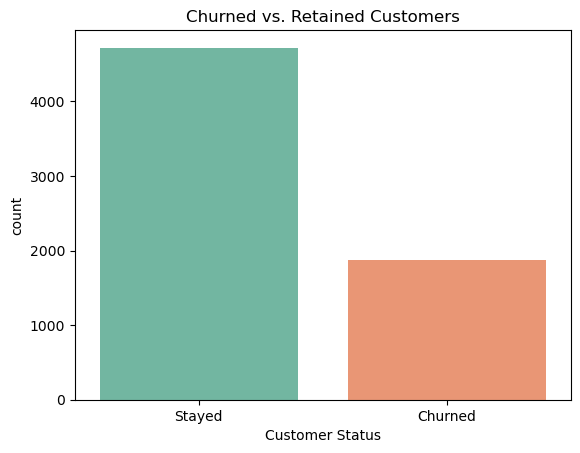

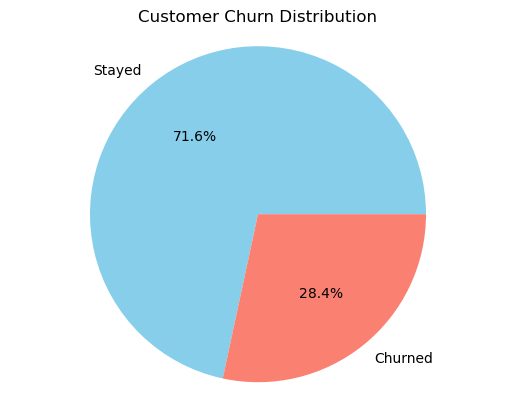

In [3]:
#1. Analyze the Distribution of Churned vs. Retained Customers
churn_counts = df['Customer Status'].value_counts()
print(churn_counts)

# Bar plot
sns.countplot(x='Customer Status', data=df, palette='Set2')
plt.title('Churned vs. Retained Customers')
plt.show()

# Pie chart
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Customer Churn Distribution')
plt.axis('equal')
plt.show()

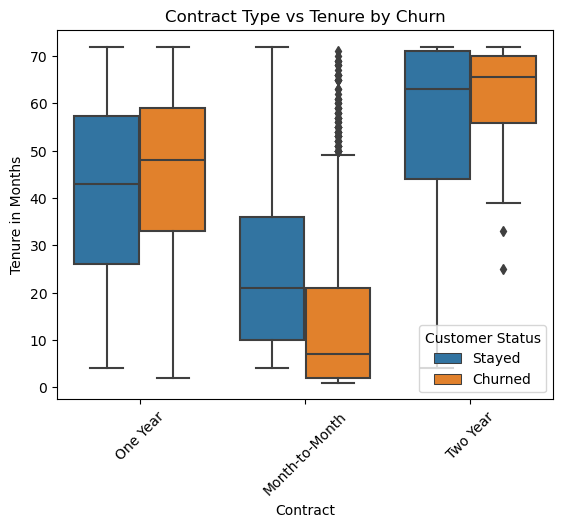

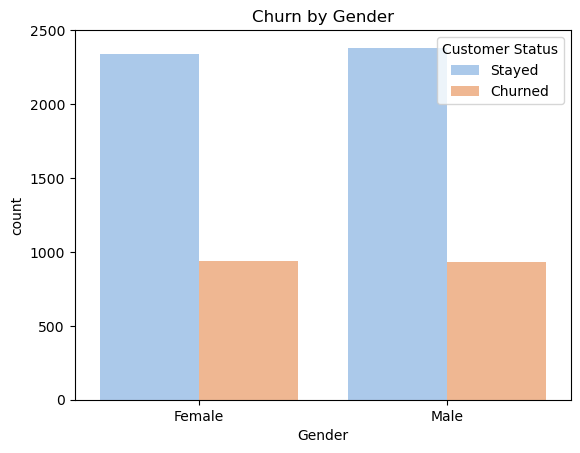

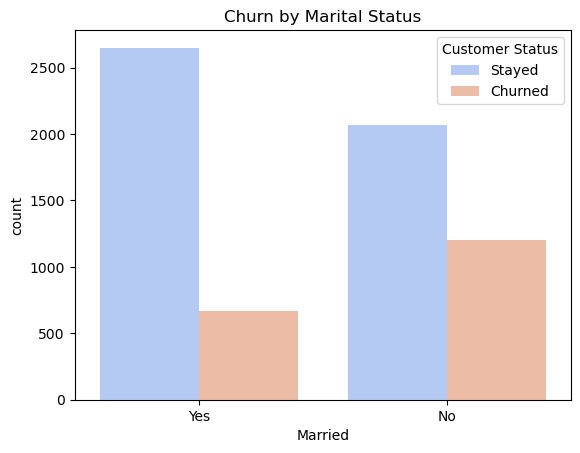

In [17]:
#2. Explore Demographic and Subscription-Based Factors

# Boxplot for Contract types
sns.boxplot(x='Contract', y='Tenure in Months', hue='Customer Status', data=df)
plt.xticks(rotation=45)
plt.title('Contract Type vs Tenure by Churn')
plt.show()

# Gender vs Churn
sns.countplot(x='Gender', hue='Customer Status', data=df, palette='pastel')
plt.title('Churn by Gender')
plt.show()

# Married vs Churn
sns.countplot(x='Married', hue='Customer Status', data=df, palette='coolwarm')
plt.title('Churn by Marital Status')
plt.show()



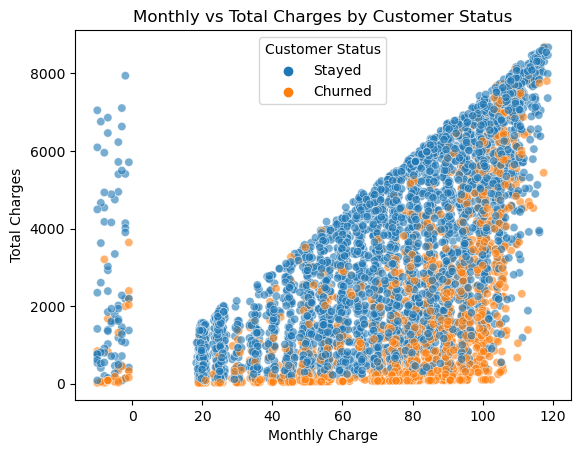

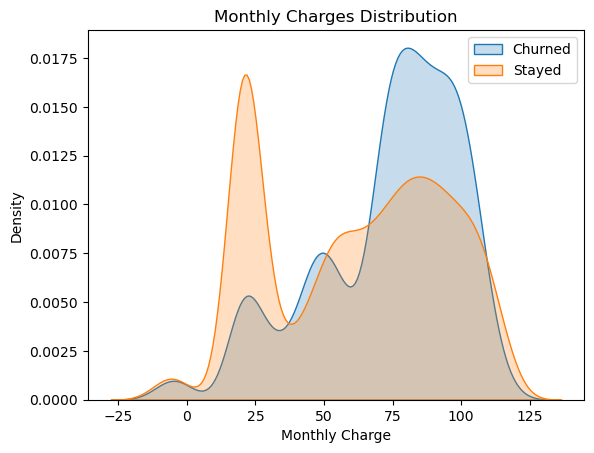

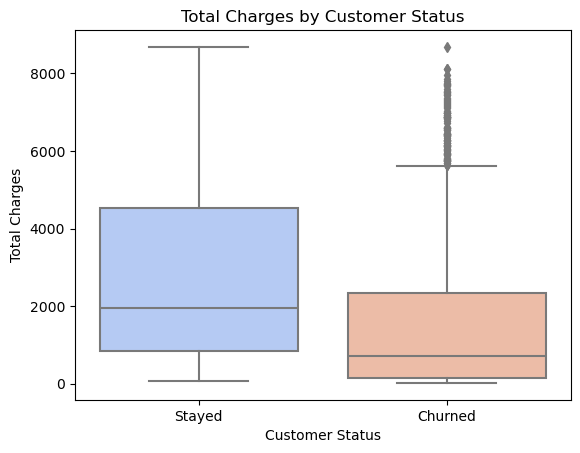

In [13]:
#3. Investigate Financial and Service Usage Patterns

# Drop rows with missing Total Charges for accurate scatter plot
df_clean = df.dropna(subset=['Total Charges'])

# Scatter plot: Monthly vs Total Charges
sns.scatterplot(x='Monthly Charge', y='Total Charges', hue='Customer Status', data=df_clean, alpha=0.6)
plt.title('Monthly vs Total Charges by Customer Status')
plt.show()

# KDE plot: Monthly Charges
sns.kdeplot(data=df[df['Customer Status'] == 'Churned']['Monthly Charge'], label='Churned', fill=True)
sns.kdeplot(data=df[df['Customer Status'] == 'Stayed']['Monthly Charge'], label='Stayed', fill=True)
plt.title('Monthly Charges Distribution')
plt.legend()
plt.show()

# Boxplot for Total Charges
sns.boxplot(x='Customer Status', y='Total Charges', data=df_clean, palette='coolwarm')
plt.title('Total Charges by Customer Status')
plt.show()# Drop rows with missing Total Charges



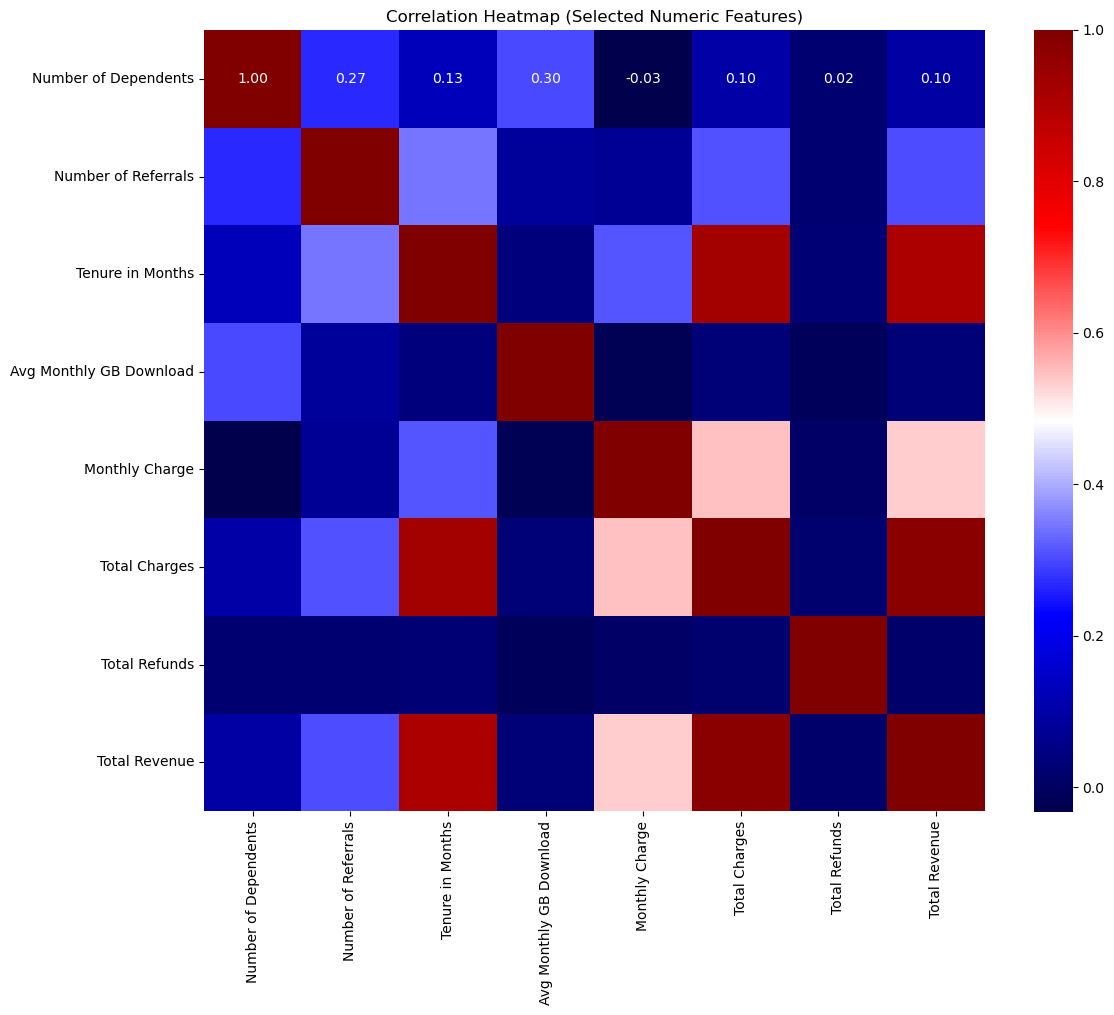

In [16]:
#4. Check Correlations Between Features

# Select relevant numeric columns
selected_columns = [
    'Number of Dependents', 'Number of Referrals', 'Tenure in Months','Avg Monthly GB Download',
    'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Revenue'
]

# Drop rows with NaNs in selected columns
filtered_df = df[selected_columns].dropna()

# Compute correlation matrix
correlation_matrix = filtered_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True,cmap='seismic', fmt=".2f", square=True)
plt.title("Correlation Heatmap (Selected Numeric Features)")
plt.tight_layout()
plt.show()

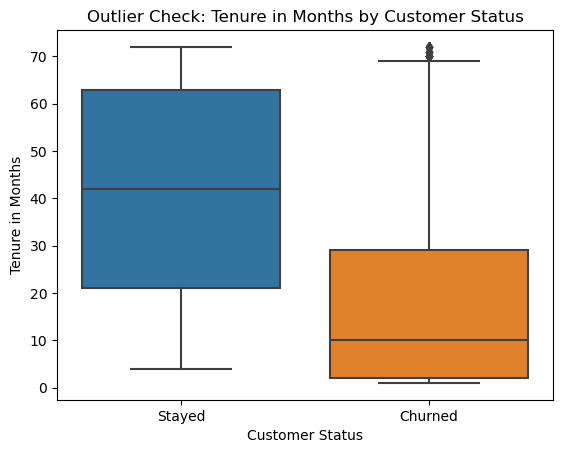

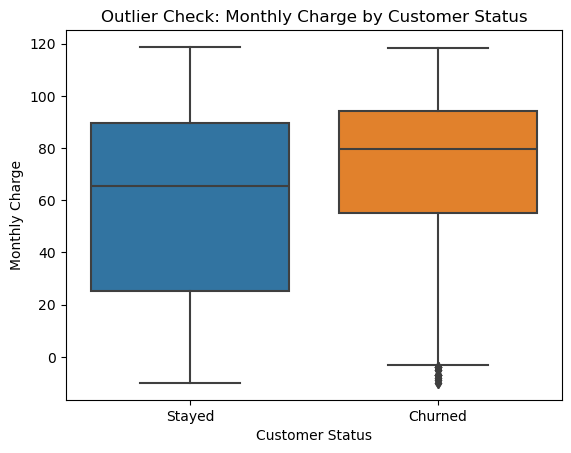

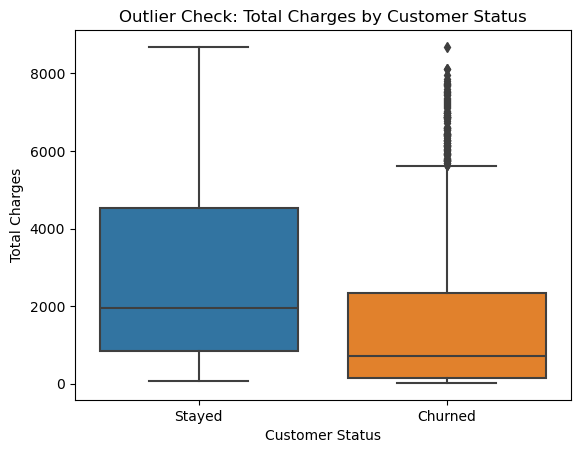

Tenure in Months: Found 0 potential outliers.
Monthly Charge: Found 0 potential outliers.
Total Charges: Found 0 potential outliers.


In [15]:
#5. Detect Anomalies and Outliers in Customer Behavior

# Boxplots for outlier detection
num_cols = ['Tenure in Months', 'Monthly Charge', 'Total Charges']

# Box plots to check outliers visually
for col in num_cols:
    sns.boxplot(x='Customer Status', y=col, data=df)
    plt.title(f'Outlier Check: {col} by Customer Status')
    plt.show()

# IQR method to identify outliers numerically
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: Found {len(outliers)} potential outliers.")
